<a href="https://colab.research.google.com/github/MichelleFaria/sales_teste/blob/main/Trabalho_dados_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados_vendas = pd.read_csv('https://raw.githubusercontent.com/MichelleFaria/sales_teste/main/sales.csv')
dados_vendas.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [ ]:
#Profit: Lucro.
#Margin: margem é a diferença entre o preço pelo qual um produto é vendido e os custos associados à fabricação.
#Sales: vendas referem-se a qualquer transação em que dinheiro é trocado pelo produto/serviço.
#COGS: Cost of goods sold (COGS) é o custo das mercadorias vendidas o custo de fabricar.
#Total Expenses: As despesas de uma empresa são os gastos para administrar o negócio.
#Marketing: Custos para apresentar os produtos e serviços de uma organização a clientes.
#Inventory: São as matérias-primas usadas para produzir um produto, assim como o proprio produto.
#Budget: O valor que esperávamos de retorno.

In [ ]:
dados_vendas['Date']=pd.to_datetime(dados_vendas['Date'])
dados_vendas.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular


In [ ]:
dados_vendas.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [ ]:
dados_vendas.shape
#numero de elementos

(4248, 20)

In [ ]:
#Verificar o nome das colunas 
lista= dados_vendas.columns
lista

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [ ]:
dados_vendas.dtypes

Area Code                  int64
State                     object
Market                    object
Market Size               object
Profit                   float64
Margin                   float64
Sales                    float64
COGS                     float64
Total Expenses           float64
Marketing                float64
Inventory                float64
Budget Profit            float64
Budget COGS              float64
Budget Margin            float64
Budget Sales             float64
ProductId                  int64
Date              datetime64[ns]
Product Type              object
Product                   object
Type                      object
dtype: object

In [ ]:
dados_vendas['Product Type'].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

In [ ]:
dados_vendas['Type'].value_counts()

Regular    2400
Decaf      1848
Name: Type, dtype: int64

#1. Quais os 3 produtos mais vendidos? E qual o produto tem um lucro maior e qual que tem um prejuizo maior?


In [ ]:
products= dados_vendas['Product'].unique()
products

array(['Columbian', 'Green Tea', 'Caffe Mocha', 'Decaf Espresso', 'Lemon',
       'Mint', 'Darjeeling', 'Decaf Irish Cream', 'Chamomile',
       'Earl Grey', 'Caffe Latte', 'Amaretto', 'Regular Espresso'],
      dtype=object)

In [ ]:
print(len(products))

13


In [ ]:
products_type= dados_vendas['Product Type'].unique()
products_type

array(['Coffee', 'Tea', 'Espresso', 'Herbal Tea'], dtype=object)

In [ ]:
print(len(products_type))

4


In [ ]:
#Os mais vendidos
product_vendas= dados_vendas['Product'].value_counts()
print (product_vendas)

Columbian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Darjeeling           384
Decaf Irish Cream    384
Chamomile            384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             192
Regular Espresso      72
Name: Product, dtype: int64


In [ ]:
#Agrupamos os grupos segundo seu produto
marketGroup = dados_vendas.groupby(by='Product')
print(marketGroup.head())

     Area Code          State   Market   Market Size  Profit  Margin  Sales  \
0          203    Connecticut     East  Small Market   107.0   176.0  292.0   
1          203    Connecticut     East  Small Market    75.0   135.0  225.0   
2          203    Connecticut     East  Small Market   122.0   195.0  325.0   
3          203    Connecticut     East  Small Market   105.0   174.0  289.0   
4          203    Connecticut     East  Small Market   104.0   135.0  223.0   
..         ...            ...      ...           ...     ...     ...    ...   
163        212       New York     East  Major Market   646.0   526.0  815.0   
187        216           Ohio  Central  Major Market    37.0    71.0  122.0   
810        339  Massachusetts     East  Major Market    84.0   149.0  298.0   
811        339  Massachusetts     East  Major Market    83.0   149.0  298.0   
812        339  Massachusetts     East  Major Market   112.0   146.0  288.0   

      COGS  Total Expenses  Marketing  Inventory  B

In [ ]:
print(marketGroup.Profit.describe())

                   count        mean         std    min    25%    50%     75%  \
Product                                                                         
Amaretto           192.0   25.468750   64.848991 -192.0   6.50   25.0   47.00   
Caffe Latte        216.0   52.662037   61.335006  -22.0  11.00   35.0   69.25   
Caffe Mocha        480.0   36.829167   97.495763 -392.0   9.00   27.0   69.00   
Chamomile          384.0   70.914062   72.901525  -17.0  23.75   42.0  105.00   
Columbian          480.0  116.258333  146.262083   -7.0  27.00   49.5  156.00   
Darjeeling         384.0   75.658854   77.548003  -16.0  19.00   45.0  112.00   
Decaf Espresso     408.0   72.308824   69.520914    6.0  27.00   47.5   87.00   
Decaf Irish Cream  384.0   36.429688   72.411215 -221.0   9.00   35.0   71.25   
Earl Grey          288.0   83.902778   77.109752  -24.0  20.75   68.0  133.25   
Green Tea          288.0   -0.802083  145.972836 -638.0   0.00   30.0   58.25   
Lemon              480.0   6

Text(0, 0.5, 'Profits($)')

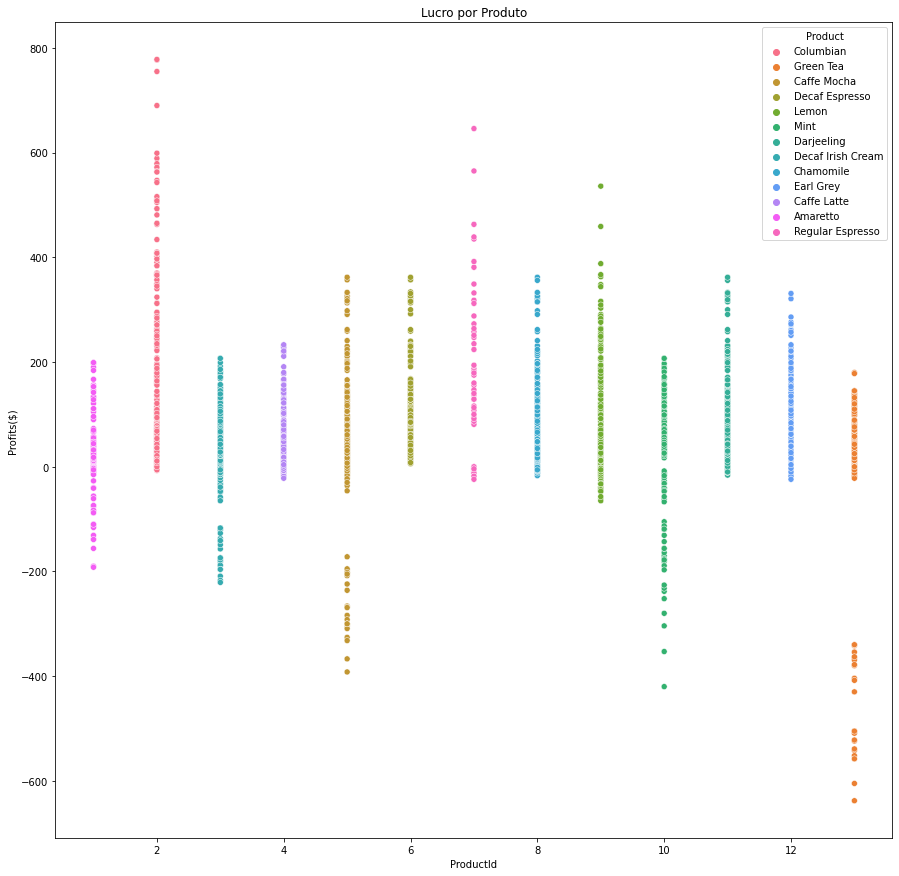

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=dados_vendas, x='ProductId', y='Profit', hue='Product')
plt.title('Lucro por Produto')
plt.ylabel('Profits($)')

#2. Quais os estados que mais faturam?

In [ ]:
state= dados_vendas['State'].unique()
print(len(state))

20


In [ ]:
dados_vendas['State'].value_counts()

Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: State, dtype: int64

In [ ]:
#plt.figure(figsize=(23,8))
#sns.countplot(x='State', data=dados_vendas)

In [ ]:
dados_agrupados = dados_vendas.groupby(['State', 'Product'], as_index=False).sum()


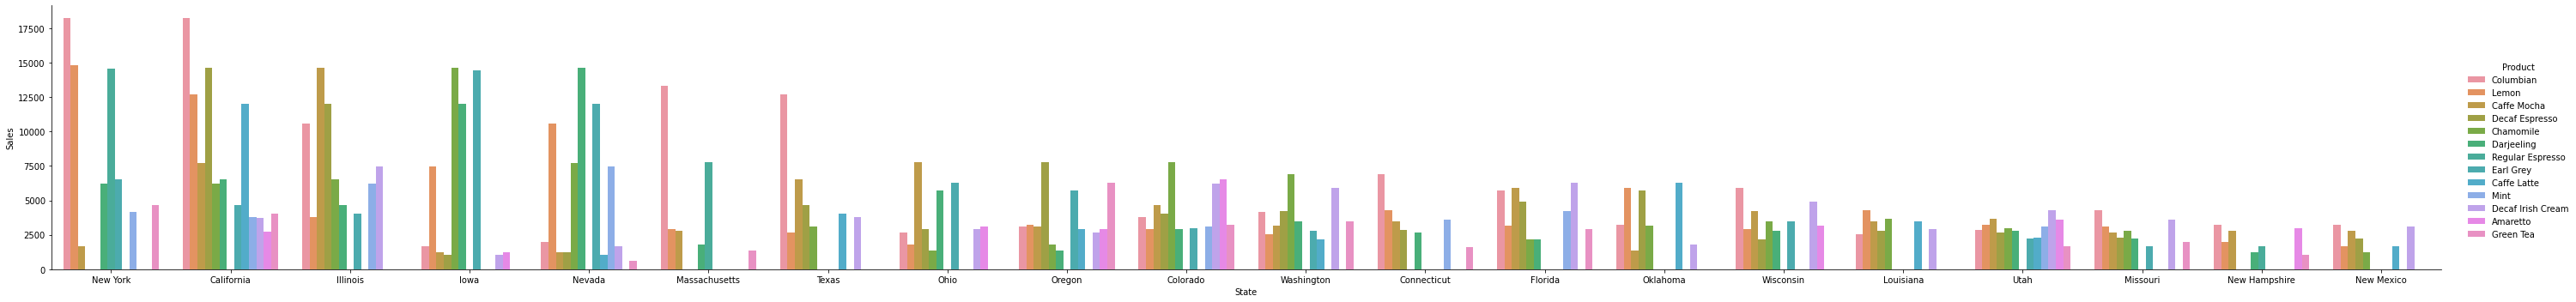

In [ ]:
dados_10primeiros = dados_agrupados.sort_values(by='Sales', ascending=False)
sns.catplot(x='State', y='Sales', data=dados_10primeiros, hue='Product', kind='bar', aspect=8)

#3.1 Prever


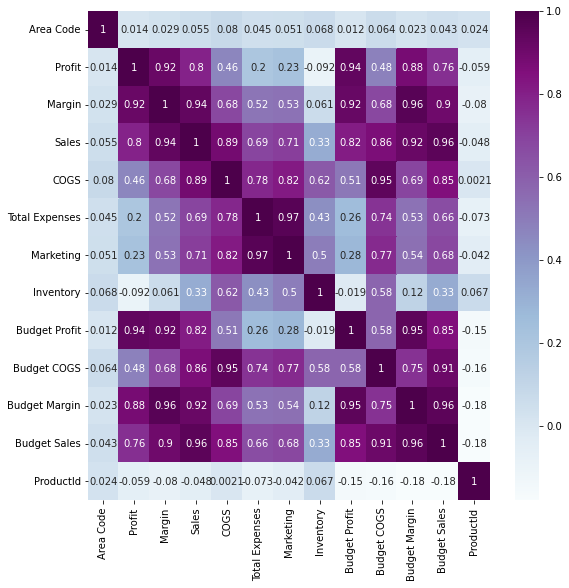

In [ ]:
# Plotando um gráfico de correlação, para ver como os dados se correlacionam.
plt.rcParams['figure.figsize'] = (9,9)
sns.heatmap(dados_vendas.corr(),cmap="BuPu", annot=True)

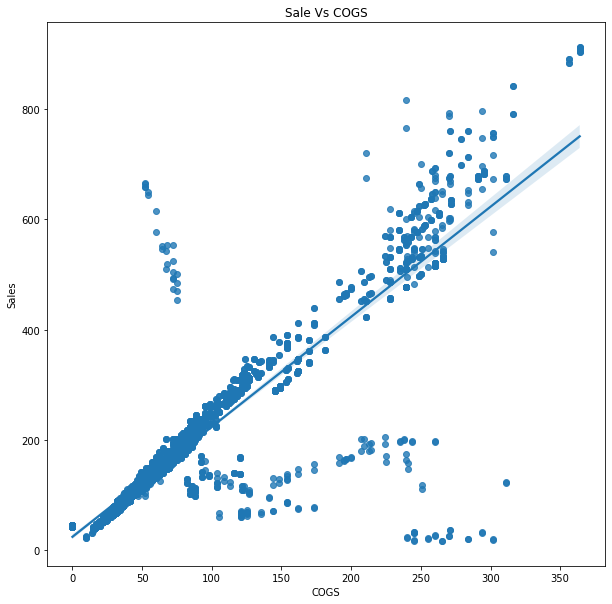

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Sale Vs COGS")
plt.xlabel("COGS")
plt.ylabel("Sales")
sns.regplot(data=dados_vendas,x='COGS',y='Sales')

In [ ]:
dados1=dados_vendas.drop('Date',axis=1).copy()
dados2=dados1.drop('Product',axis=1).copy()
dados2

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,Coffee,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,Coffee,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,Coffee,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,Espresso,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,Espresso,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,Espresso,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,Espresso,Regular


In [ ]:
dados2['Inventory']= dados2['Inventory'].apply(lambda value: value if value>=0 else 0)
dados2['Inventory']

0        962.0
1       1148.0
2       1134.0
3       1166.0
4       1148.0
         ...  
4243       0.0
4244       0.0
4245       0.0
4246      37.0
4247       0.0
Name: Inventory, Length: 4248, dtype: float64

Dados limpos

In [ ]:
col_names =['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Product Type', 'Type']
for col in col_names:
          print(dados2[col].value_counts())   

435    215
603    168
505    168
775    144
702    120
      ... 
940      4
361      4
713      4
858      4
559      4
Name: Area Code, Length: 156, dtype: int64
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: State, dtype: int64
West       1344
Central    1344
East        888
South       672
Name: Market, dtype: int64
Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64
 47.0     73
 17.0     63
 28.0     62
 16.0     60
 12.0     59
          ..
 777.0     1
-36.0      1
 222.0     1
-56.0      1
 250.0     1
Name: Profit, Length: 466, dtype: int64
 43.0     92
 73.0     74
 72.0     72
 68

In [ ]:
#dados2['COGS'].value_counts()

In [ ]:
!pip install category_encoders

import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# codifica variáveis ​​com codificação ordinal
encoder = ce.OrdinalEncoder(cols=[ 'State', 'Market', 'Market Size', 'Product Type', 'Type'])


dados3 = encoder.fit_transform(dados2)
dados3


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,Type
0,203,1,1,1,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,1,1
1,203,1,1,1,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,1,1
2,203,1,1,1,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,1,1
3,203,1,1,1,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,1,1
4,203,1,1,1,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,8,3,1,-6.0,66.0,113.0,47.0,72.0,42.0,0.0,0.0,40.0,50.0,90.0,4,3,1
4244,985,8,3,1,-7.0,61.0,105.0,44.0,68.0,39.0,0.0,10.0,30.0,60.0,90.0,4,3,1
4245,985,8,3,1,-3.0,76.0,131.0,55.0,79.0,49.0,0.0,0.0,40.0,60.0,100.0,4,3,1
4246,985,8,3,1,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,3,1


In [ ]:
dados4=dados3.drop('Profit',axis=1)

In [ ]:
dados5=dados4.drop('Margin',axis=1)
dados5

,Area Code,State,Market,Market Size,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,Type
0,203,1,1,1,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,1,1
1,203,1,1,1,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,1,1
2,203,1,1,1,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,1,1
3,203,1,1,1,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,1,1
4,203,1,1,1,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,8,3,1,113.0,47.0,72.0,42.0,0.0,0.0,40.0,50.0,90.0,4,3,1
4244,985,8,3,1,105.0,44.0,68.0,39.0,0.0,10.0,30.0,60.0,90.0,4,3,1
4245,985,8,3,1,131.0,55.0,79.0,49.0,0.0,0.0,40.0,60.0,100.0,4,3,1
4246,985,8,3,1,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,3,1


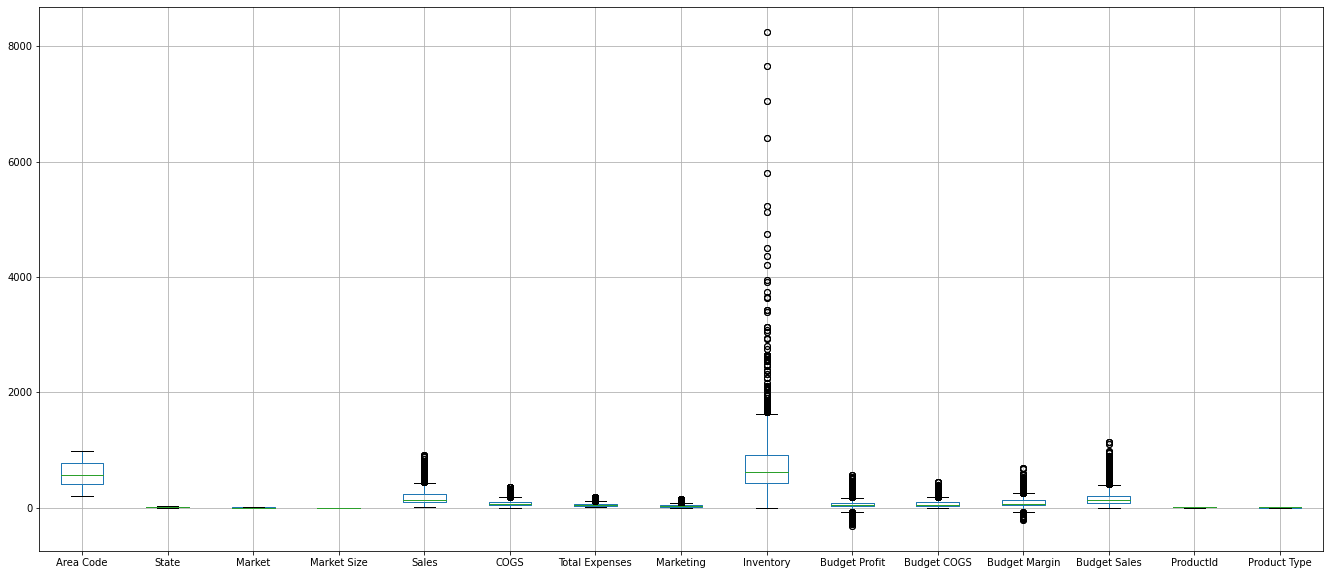

In [ ]:
#plotar um boxplot para analisar presença de outliers(dados que se diferenciam drasticamente) no dataset
colunas = dados5.columns.to_list()
plt.figure(figsize=(23,10))
dados5.boxplot(column = colunas[:-1])
plt.show()

In [ ]:
#Dropando a coluna(axis=1) 'COGS'
X = dados5.drop(['COGS'], axis=1)

y = dados5['COGS']

In [ ]:
#plt.figure(figsize=(23,10))
#sns.countplot('Sales', data=dados5);

In [ ]:
# dividir X e y em conjuntos de treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# verifica a forma de X_train e X_test
X_train.shape, X_test.shape

((2846, 15), (1402, 15))

In [ ]:
X_train.head()

,Area Code,State,Market,Market Size,Sales,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,Type
1615,505,18,3,1,113.0,69.0,40.0,325.0,0.0,30.0,50.0,80.0,5,3,1
3079,720,11,4,2,224.0,36.0,24.0,1003.0,90.0,80.0,120.0,200.0,3,1,2
1643,505,18,3,1,45.0,17.0,5.0,816.0,20.0,10.0,30.0,40.0,8,4,2
1070,419,6,4,2,121.0,54.0,20.0,337.0,30.0,60.0,80.0,140.0,6,3,2
4073,970,11,4,2,387.0,75.0,50.0,1283.0,100.0,170.0,160.0,330.0,8,4,2


In [ ]:
X_train.dtypes

Area Code           int64
State               int64
Market              int64
Market Size         int64
Sales             float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Product Type        int64
Type                int64
dtype: object

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Inferir um modelo preditivo a partir de um conjunto de exemplos de treinamento rotulados.
# Usa árvores de decisão para seu modelo de conjunto. Cada árvore é um aprendiz fraco.
# O algoritmo segue construindo sequencialmente mais árvores de decisão, cada uma corrigindo o erro da árvore anterior até que uma condição de parada seja alcançada.


In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#n_estimators: número de árvores de decisão a serem usadas no modelo. Quanto maior o número de árvores, mais complexo será o modelo.
#max_depth: profundidade máxima das árvores de decisão. Quanto maior a profundidade, mais complexo será o modelo.
#learning_rate: taxa de aprendizagem do modelo. É um valor que controla a magnitude das atualizações de pesos a cada iteração.
#subsample: fração de observações a serem usadas para cada árvore de decisão. Valores menores resultam em modelos mais simples e menos propensos a overfitting.
#random_state: semente para o gerador de números aleatórios usado na construção do modelo. Isso garante que o modelo será construído de forma determinista, ou seja, sempre produzirá os mesmos resultados para um mesmo conjunto de dados.

clf = XGBClassifier(n_estimators = 50,
                    max_depth = 10, 
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=0)

# Training the XGB classifier
clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=50,
              objective='multi:softprob')

In [ ]:
#fazendo a predição com os dados de teste
y_pred = clf.predict(X_test)
# Cobinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
718,245.0,245.0
3116,62.0,62.0
3061,91.0,91.0
2552,228.0,228.0
120,48.0,48.0


A partir da comparação acima, cada rótulo real está sendo previsto com precisão, mas pode haver alguns casos em que o modelo fez previsões imprecisas. Vamos revelar tudo isso usando a matriz de confusão.

Lembrando que a matriz de confusão é uma tabela que representa os acertos e erros de uma classificação. Dessa forma é possível fazer cálculos de desempenho através destes resultados obtidos(famosos Falso positivo/negativo e Vdd positivo/negativo.   N consgui simplificar

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

In [ ]:
# Score da Acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo: {round(accuracy_score(y_test, y_pred)*100,3)}%')

Precisão do modelo: 61.769%


In [ ]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
        10.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.62      1.00      0.77         5
        17.0       1.00      0.75      0.86         4
        18.0       0.73      0.73      0.73        11
        19.0       0.18      1.00      0.31         2
        20.0       0.89      0.44      0.59        18
        21.0       0.92      0.92      0.92        12
        22.0       0.71      0.77      0.74        13
        23.0       0.72      0.81      0.76        16
        24.0       1.00      0.25      0.40         8
        25.0       0.93      1.00      0.96        13
        27.0       0.00      0.00      0.00         2
        28.0       0.62      1.00      0.77         5
        29.0       0.73      0.69      0.71        16
        30.0       0.80    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Nessa 2ª Iteração, iremos balancear o nosso dataset para verificar se haverá melhora na acurácia do modelo.

In [ ]:
! pip install imbalanced-learn

# carrega a bibliotecas necessárias para a 2ª iteração
from imblearn.over_sampling import SMOTE
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# executa o balanceamento usando a técnica SMOTE
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

# realiza a contagem das classes
#contagem = Counter(y)
#print(contagem)

In [ ]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)


In [ ]:
clf2 = XGBClassifier(n_estimators = 650, 
                     max_depth = 10, 
                     learning_rate = 0.01,
                     subsample = 1,
                     random_state=0)

# Training the XGB classifier
clf2.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=650,
              objective='multi:softprob')

In [ ]:
# fazendo a predição com os dados de teste
y_pred = clf2.predict(X_test)
# Cobinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
2672,104.0,104.0
927,114.0,114.0
2060,0.0,0.0
4020,35.0,35.0
2911,105.0,105.0


In [ ]:
# Score da Acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo : {round(accuracy_score(y_test, y_pred)*100,3)}%')

Precisão do modelo : 89.176%


In [ ]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
        10.0       1.00      1.00      1.00         1
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         9
        17.0       1.00      1.00      1.00         3
        18.0       0.81      1.00      0.90        13
        19.0       1.00      0.62      0.77         8
        20.0       0.89      0.89      0.89         9
        21.0       0.91      0.91      0.91        11
        22.0       1.00      0.90      0.95        10
        23.0       1.00      1.00      1.00        16
        24.0       0.86      1.00      0.92         6
        25.0       1.00      1.00      1.00         9
        27.0       0.50      1.00      0.67         1
        28.0       0.64      0.90      0.75        10
        29.0       0.89      0.44      0.59        18
        30.0       1.00      0.62      0.77         8
        31.0       0.92    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3.2 Predição 2

In [ ]:
from sklearn.model_selection import train_test_split

y2 = train['COGS']
X2 = train[['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Product Type', 'Type']]


NameError: ignored

In [ ]:
'lista2= dados3.columns
lista2

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Product Type', 'Type'],
      dtype='object')

In [ ]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=8, shuffle=True)
scores = []

for train_index, val_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[val_index]
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]
    
    model = xgb.XGBRegressor(max_depth=8, objective='reg:squarederror', eta=0.3, subsample=0.8, colsample_bytree=0.9,
                            colsample_bylevel=1, min_child_weight=10, nthread=3, eval_metric='rmse',
                            early_stopping_rounds=30)
    
    model.fit(X_train, y_train, eval_set=[(X_test,y_test)], verbose=False)
    
    y_pred = model.predict(X_test)
    scores.append(model.best_score)
    
print('Score médio:', np.mean(scores))

AttributeError: ignored

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("Mape", mape)
print("R2:", r2)

MAE: 138.5891403191058
Mape 1.1639253330302834
R2: -1.0142753266835363


ValueError: ignored

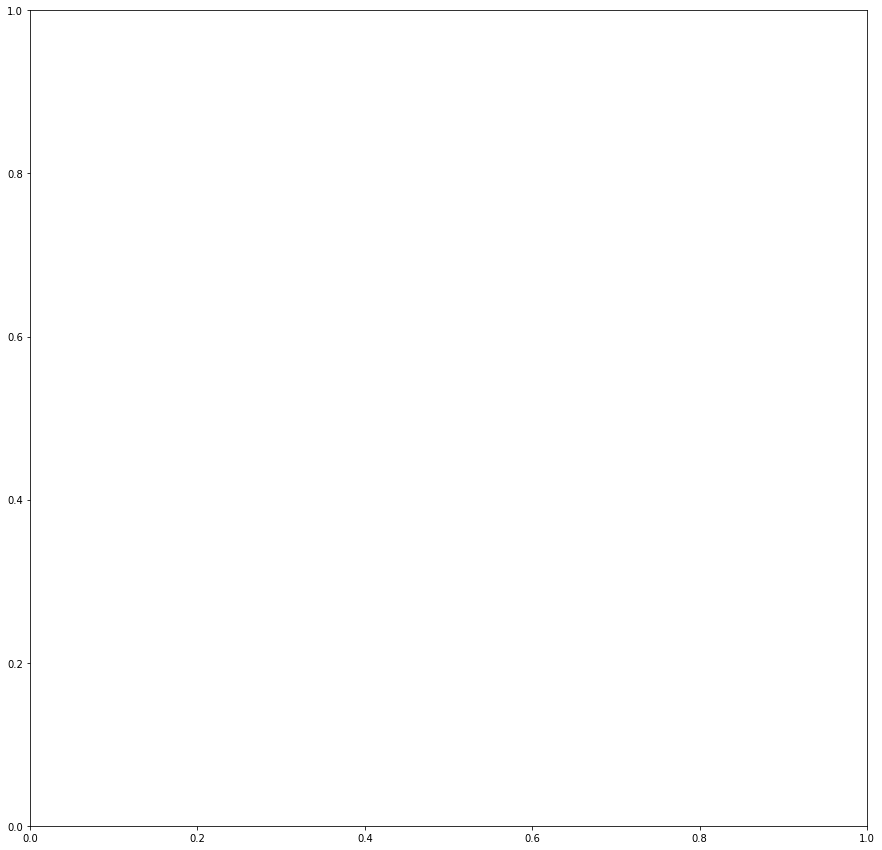

In [ ]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(dados2,ax = axes,height =0.5)
plt.show();plt.close()

#3.3 Predição 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# medir a qualidade de uma divisão
# Gini nos diz qual é a probabilidade de classificar erroneamente uma observação.
# Quanto menor o Gini, melhor a divisão. 

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([160.,  56.,  56., 160., 160., 114., 114., 160., 160., 160., 160.,
       160., 160.,  80., 114., 114., 160., 114., 160., 160., 160.,  80.,
       114., 114.,  80., 160., 160., 114., 114., 160., 114., 160., 160.,
       160., 114., 114., 160., 160., 160., 160., 114., 160., 160., 160.,
        80., 114., 114., 160., 114., 114., 114., 160., 160., 160., 160.,
       160., 160., 160., 160., 160.,  80., 114., 160., 160.,  80.,  80.,
        80.,  80.,  80.,  80., 114., 160.,  80.,  80.,  56., 160., 160.,
       114., 114., 160.,  80., 160., 160., 160., 160., 160., 160., 160.,
       160., 114., 160., 160., 160., 114., 114., 160., 160., 160., 160.,
       114., 114., 160., 160., 160.,  80., 114., 160., 114., 160., 160.,
       160., 160.,  56., 160., 160., 160., 160., 160., 160., 114., 160.,
       160., 160., 160., 160., 160., 114., 114., 160., 160.,  56., 160.,
       160., 114.,  56., 160., 114., 160., 160., 160., 160., 160.,  80.,
        56.,  56.,  80.,  80., 160., 114., 160., 11

In [ ]:
from sklearn.metrics import accuracy_score

print('Pontuação de precisão do modelo com índice gini de critério: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Pontuação de precisão do modelo com índice gini de critério: 0.0508


In [ ]:
y_train.describe()

count    3717.000000
mean      192.679849
std       150.415421
min        17.000000
25%       100.000000
50%       137.000000
75%       230.000000
max       912.000000
Name: Sales, dtype: float64

In [ ]:
y_train.value_counts()

114.0    48
43.0     45
129.0    41
109.0    40
110.0    38
         ..
650.0     1
658.0     1
747.0     1
483.0     1
454.0     1
Name: Sales, Length: 421, dtype: int64

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([160., 160., 160., ..., 114., 160., 160.])

In [ ]:
print('Pontuação de precisão do conjunto de treinamento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Pontuação de precisão do conjunto de treinamento: 0.0506


In [ ]:
# imprime as pontuações no conjunto de treinamento e teste

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.0506
Test set score: 0.0508


In [ ]:
from sklearn import tree
import graphviz 

[Text(0.4090909090909091, 0.875, 'X[6] <= 5.0\ngini = 0.995\nsamples = 3717\nvalue = [1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2\n1, 3, 3, 14, 4, 45, 18, 14, 20, 7, 18, 24, 10\n9, 9, 18, 10, 10, 25, 8, 17, 1, 20, 12, 15, 10\n8, 18, 7, 9, 18, 17, 13, 3, 14, 8, 12, 20, 12\n16, 10, 14, 29, 20, 23, 3, 14, 27, 13, 18, 16\n21, 26, 20, 18, 9, 18, 12, 11, 8, 26, 22, 10\n8, 14, 19, 23, 12, 28, 35, 21, 40, 38, 15, 23\n32, 48, 23, 14, 15, 25, 20, 35, 33, 14, 31, 15\n30, 23, 27, 28, 41, 34, 28, 31, 34, 30, 16, 10\n17, 12, 16, 27, 20, 16, 9, 7, 13, 4, 12, 9, 14\n38, 16, 15, 11, 14, 4, 11, 1, 24, 33, 6, 2, 8\n7, 10, 2, 18, 16, 17, 7, 6, 4, 7, 7, 9, 6\n15, 4, 22, 4, 8, 4, 7, 8, 10, 25, 29, 1, 9\n7, 8, 3, 5, 11, 14, 12, 13, 27, 9, 2, 4, 10\n8, 2, 22, 14, 9, 21, 5, 2, 10, 8, 4, 5, 4\n11, 16, 6, 3, 15, 13, 2, 19, 2, 8, 3, 13, 7\n6, 4, 7, 4, 7, 9, 26, 2, 3, 7, 4, 2, 17, 13\n1, 5, 11, 11, 4, 7, 4, 6, 5, 5, 4, 7, 9, 4\n5, 2, 2, 8, 8, 4, 10, 7, 6, 9, 7, 2, 2, 7\n3, 3, 27, 9, 15, 4, 4, 15, 6, 2, 9, 2, 3, 3\n11

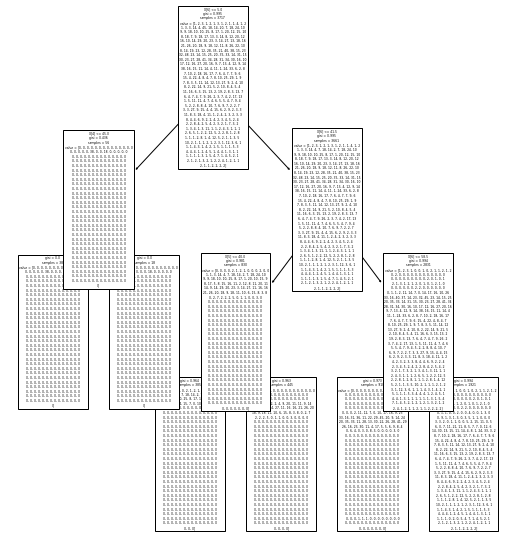

In [ ]:
tree.plot_tree(clf_gini.fit(X_train, y_train)) 